In [2]:
#%% Functions are first class objects
# 함수를 list, int같은 값으로 사용이 가능하다는 장점이 있다.

def square(x):
    return x*x

def cube(x):
    return x*x*x

In [3]:
# Dictionary : key에 value를 저장함

funcs = {
    'a': square,
    'b': cube,
}

print(funcs)

{'a': <function square at 0x0394A348>, 'b': <function cube at 0x0394A078>}


In [4]:
x = 2

print (square(x))
print (cube(x))

for func in sorted(funcs):
    print (func, funcs[func](x))

4
8
a 4
b 8


In [5]:
#%% Fuction arguments : call by "object reference"
# function을 사용할때, argument하는 것에 대해 주의해야 한다.
# x가 list, dictionary처럼 mutable하다면 call by reference
# x가 int, str처럼 immutable하다면 call by value

def transmogrify(x):
    x[0] = 999
    return x

x = [1,2,3]
print (x, id(x))
print (transmogrify(x), id(transmogrify(x)))
print (x, id(x))

[1, 2, 3] 59464120
[999, 2, 3] 59464120
[999, 2, 3] 59464120


In [6]:
def no_mogrify(x):
    x = [4,5,6]
    return x

x = [1,2,3]
print (x, id(x))
print (no_mogrify(x), id(no_mogrify(x)))
print (x, id(x))

[1, 2, 3] 59485240
[4, 5, 6] 59547936
[1, 2, 3] 59485240


In [7]:
#%% Fuction arguments : binding of default arguments occurs at function definition

def f(x = []):
    x.append(1)
    print(id(x))
    return x

print (f())
print (f())
print (f())
print (f(x = [9,9,9]))
print (f())
print (f())

59483400
[1]
59483400
[1, 1]
59483400
[1, 1, 1]
59483320
[9, 9, 9, 1]
59483400
[1, 1, 1, 1]
59483400
[1, 1, 1, 1, 1]


In [8]:
def f(x = None):
    if x is None:
        x = []
    x.append(1)
    print(id(x))
    return x

print (f())
print (f())
print (f())
print (f(x = [9,9,9]))
print (f())
print (f())

59483240
[1]
59483400
[1]
59483240
[1]
59483400
[9, 9, 9, 1]
59483240
[1]
59483400
[1]


In [9]:
#%% Higher-order functions
# 함수의 결과 및 함수의 인자를 받아서 다른함수에 사용하는 것을 의미

list(map(square, range(5)))

[0, 1, 4, 9, 16]

In [14]:
def is_even(x):
    return x%2 == 0

list(filter(is_even, range(5)))

[0, 2, 4]

In [15]:
# map은 true, false를 반환한다

list(map(is_even, range(5)))

[True, False, True, False, True]

In [16]:
list(map(square, filter(is_even, range(5))))

[0, 4, 16]

In [17]:
# python3 부터는 reduce는 내장함수에서 빠졌다.
# reduce는 filter, map과 다르게 list를 input으로 받는다.

import functools

def my_add(x, y):
    return x + y
  
functools.reduce(my_add, [1,2,3,4,5])

15

In [18]:
def custom_sum(xs, transform):
    return sum(map(transform, xs))

xs = range(5)
print (custom_sum(xs, square))
print (custom_sum(xs, cube))

30
100


In [19]:
# 함수를 반환하는 함수 is also useful

def make_logger(target):
    def logger(data):
        with open(target, 'a') as s:
            s.write(data + '\n')
    return logger

study_logger = make_logger('study.txt')
study_logger('안녕')
study_logger('파이썬')

In [20]:
s = open("study.txt", 'r')

while True:
    line = s.readline()
    if not line: break
    print(line, end='')
    
s.close()

안녕
파이썬


In [21]:
#%% Anonymous functions

def square(x):
    return x*x

print (list(map(square, range(5))))

[0, 1, 4, 9, 16]


In [22]:
# Using lambda

print (list(map(lambda x: x*x, range(5))))

[0, 1, 4, 9, 16]


In [23]:
s1 = functools.reduce(lambda x, y: x+y, map(lambda x: x**2, range(1,10)))
print (s1)

s2 = sum(x**2 for x in range(1,10))
print (s2)

285
285


In [24]:
#%% Iterators
# for 문은 sequence 뿐만 아니라 dictionary, list 등 순서에 상관없는 데이터에도 사용
# iterator는 다음 출력이 무엇인지 보여주는 것

xs = [1,2,3]
x_iter = iter(xs)

print (next(x_iter))
print (next(x_iter))
print (next(x_iter))
print (next(x_iter))

1
2
3


StopIteration: 

In [25]:
x_iter = iter(xs)
for x in x_iter:
    print (x)

1
2
3


In [27]:
#%% Generators
# 앞의 iterator와 비슷하다. 다만 yield 문 사용

def count_down(n):
    for i in range(n, 0, -1):
        yield i

In [28]:
counter = count_down(10)
print (next(counter))
print (next(counter))
for count in counter:
    print(count, end=' ')

10
9
8 7 6 5 4 3 2 1 

In [29]:
xs1 = [x*x for x in range(5)]
print (xs1)

xs2 = (x*x for x in range(5))
print (xs2)

for x in xs2:
    print (x, end=' ')

[0, 1, 4, 9, 16]
<generator object <genexpr> at 0x03960470>
0 1 4 9 16 

In [30]:
def fib():
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a+b

In [31]:
for i in fib():
    if i > 1000:
        break
    print (i, end=' ')

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 

In [32]:
for line in open('study.txt','r'):
    print (line, end='')

안녕
파이썬


In [33]:
#%% Generators : Generators and comprehensions

print (x for x in range(10))

print ([x for x in range(10)])

print ({x for x in range(10)})

print ({x: x for x in range(10)})

<generator object <genexpr> at 0x039608F0>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}


In [34]:
#%% Generators : Utilites - enumerate, zip and the ternary if-else operator

xs = [1,2,3,4]
for i in range(len(xs)):
    print (i, xs[i])
print ()

for i, x in enumerate(xs):
    print (i, x)

0 1
1 2
2 3
3 4

0 1
1 2
2 3
3 4


In [35]:
xs = [1, 2, 3, 4]
ys = [10, 20, 30, 40]
zs = ['a', 'b', 'c', 'd', 'e']

for x, y, z in zip(xs, ys, zs):
    print (x, y, z)

1 10 a
2 20 b
3 30 c
4 40 d


In [36]:
[x**2 if x%2 == 0 else x**3 for x in range(10)]

[0, 1, 4, 27, 16, 125, 36, 343, 64, 729]

0 5.3254237288135595 482.9027851567349
1 6.854218980132854 112.78459729896915
2 7.821607493223549 45.76666221374958
3 8.359503057752283 35.96699310977093
4 8.561890044193905 35.21190766265462
5 8.590721034104195 35.20062461885276
6 8.591272614592903 35.200620688206975
7 8.591272813881039 35.20062068820646


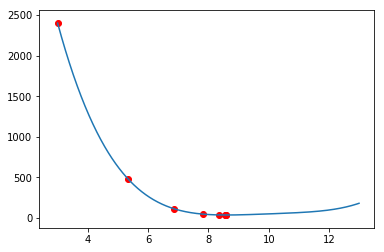

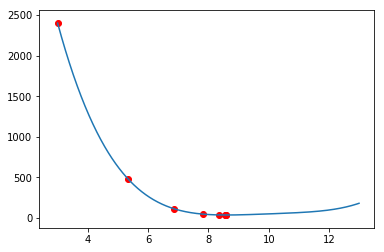

In [40]:
#%% Newton's Method
# objective function = (x - 3.0)**2 + (x - 10.0)**4
# derivartive = 2*(x-3.0) + 4*(x - 10.0)**3
# second order derivertive = 2 + 12*(x-10.0)**2

init_point = 3.0

def obj_cal(x):
    return (x - 3.0)**2 + (x - 10.0)**4

def der_cal(x):
    return 2*(x-3.0) + 4*(x - 10.0)**3

def so_der_cal(x):
    return 2 + 12*(x-10.0)**2

point = [3.0]
obj_value = [obj_cal(3.0)]

for i in range(1000):
    if i == 0:
        old_point = init_point
	
    new_point = old_point - der_cal(old_point)/so_der_cal(old_point)
    obj = obj_cal(new_point)
    
    print(i, new_point, obj)
    
    if (new_point - old_point)**2 < 1e-10:
        break
    
    else :
        point.append(new_point)
        obj_value.append(obj)
        old_point = new_point

from matplotlib import pyplot as plt
y = [y/100 for y in range(300, 1300)]
y_value = list(map(obj_cal, y))

plt.plot(y, y_value)
plt.scatter(point, list(map(obj_cal, point)), color = "red")
plt.gcf()

0 4.372 1005.1489857794561
10 7.076834813278085 89.63580768031053
20 7.700824902721232 50.04172999318673
30 8.002635264171111 40.94219765730786
40 8.180404690596236 37.798830953675036
50 8.29548736327906 36.48332248664336
60 8.374152236722043 35.868975106882424
70 8.429807048584841 35.56152395084323
80 8.470102151308486 35.40036705119743
90 8.499749671609022 35.31312672970397
100 8.521815582282843 35.26479981064917
110 8.538376996255296 35.2375760607639
120 8.550884299683194 35.22204902672503
130 8.56037368086813 35.21311094752966
140 8.56759841350015 35.20792989269753
150 8.573113434168793 35.20491081670474
160 8.577331751722282 35.20314452497013
170 8.580563158920748 35.20210802195266
180 8.583041427397431 35.2014983636353
190 8.584943779146048 35.20113913290382
200 8.586405043868464 35.200927174211586
210 8.58752807999446 35.20080198061251
220 8.588391520924054 35.20072797564105
230 8.589055577778757 35.200684202581314
240 8.589566412817677 35.20065829908961
250 8.589959451342127 35

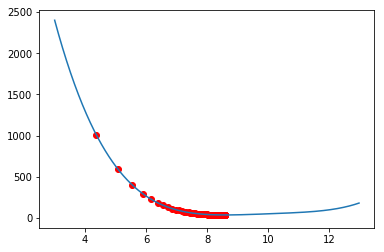

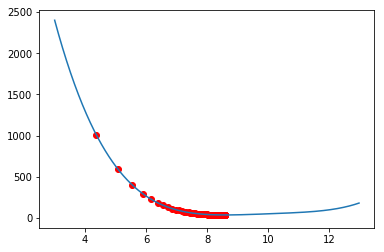

In [41]:
#%% Gradient Descent
# objective function = (x - 3.0)**2 + (x - 10.0)**4
# derivartive = 2*(x-3.0) + 4*(x - 10.0)**3
# second order derivertive = 2 + 12*(x-10.0)**2

init_point = 3
alpha = 0.001

def obj_cal(x):
    return (x-3)**2 + (x - 10)**4

def der_cal(x):
    return 2*(x-3) + 4*(x - 10)**3

def so_der_cal(x):
    return 2 + 12*(x-10)**2

point = []
obj_value = []

for i in range(1000):
    if i == 0:
        old_point = init_point
    
    new_point = old_point - alpha*der_cal(old_point)
    obj = obj_cal(new_point)
  
    if i % 10 == 0:
        print(i, new_point, obj)
    
    if (new_point - old_point)**2 < 1e-10:
        break
    else :
        point.append(new_point)
        obj_value.append(obj)
        old_point = new_point
    
from matplotlib import pyplot as plt
y = [y/100 for y in range(300, 1300)]
y_value = list(map(obj_cal, y))

plt.plot(y, y_value)
plt.scatter(point, list(map(obj_cal, point)), color = "red")
plt.gcf()

In [42]:
alpha = 0.001

def obj_cal(x):
    return (x-3)**2 + (x - 10)**4

def der_cal(x):
    return 2*(x-3) + 4*(x - 10)**3

def so_der_cal(x):
    return 2 + 12*(x-10)**2

def gred_cal():
    point = 3
    i, obj, grad_value = 1, obj_cal(3), der_cal(3)
  
    while True:
    if i % 20 == 0:
        print(i, point, obj, grad_value)
      
    yield grad_value
    point = point - alpha*der_cal(point)
    obj, grad_value = obj_cal(point), der_cal(point)
    i += 1
    
for gv in gred_cal():
    if gv < 1e-5 or i == 1000:
        break

IndentationError: expected an indented block (<ipython-input-42-8c8a4b939a9d>, line 17)